In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import time
from scipy           import signal

In [2]:
# https://stackoverflow.com/questions/19468733/how-to-implement-a-matched-filter

# A template is given
temp = np.random.randn((100));

# Create a matched filter based on the template
b = np.flipud(temp)

# For testing the matched filter, create a random signal which
# contains a match for the template at some time index
x = np.concatenate((np.random.randn((200)), temp, np.random.randn((300))));
n = range(0,len(x))

# Process the signal with the matched filter
y = signal.lfilter(b, np.ones(1), x);

#Set a detection threshold (exmaple used is 90% of template)
thresh = 0.9

# Compute normalizing factor
u = np.dot(temp,temp);

## 
aa = y>(thresh*u)

In [3]:
# Find matches
matches = np.asarray(n)[aa];

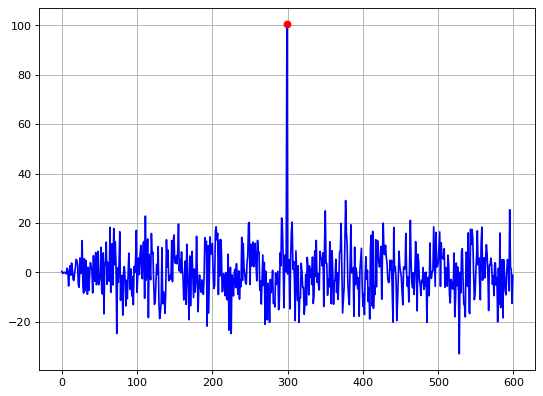

In [4]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(np.asarray(n),y,'b', np.asarray(n)[matches], y[matches], 'ro')
ax.grid()
plt.show()


# with sin

In [11]:
f_e = 1e6;
dt = 1e-10;
stop = 1e-5;
delay = 1e-8;
stdev = 0.9;

s_simulation = np.linspace(dt, stop, int(stop/dt));
s_e = np.sin(2*np.pi* f_e *s_simulation - np.pi/32);
s_r = np.sin(2*np.pi* f_e *(s_simulation - delay) - np.pi/32) + stdev*np.random.randn((len(s_simulation)));

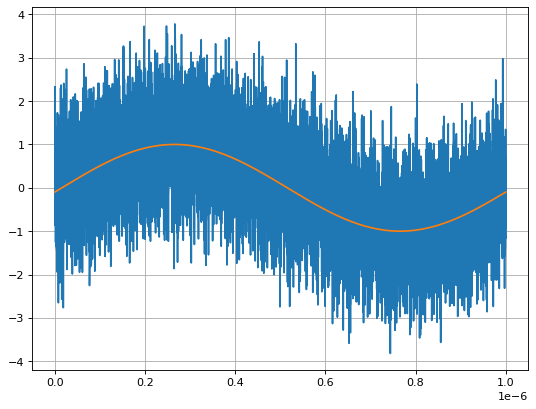

In [12]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(s_simulation[0:10000], s_r[0:10000])
ax.plot(s_simulation[0:10000], s_e[0:10000])
ax.grid()
plt.show()

In [17]:
temp = s_e[0:int(1/(f_e*dt))];

# Create a matched filter based on the template
b = np.flipud(temp)

# For testing the matched filter, create a random signal which
# contains a match for the template at some time index
x = s_r
n = range(0,len(x))

# Process the signal with the matched filter
y = signal.lfilter(b, np.ones(1), x);

#Set a detection threshold (exmaple used is 90% of template)
thresh = 0.999

# Compute normalizing factor
u = np.dot(temp,temp);

## 
aa = y>(thresh*u)

# Find matches
matches = np.asarray(n)[aa];

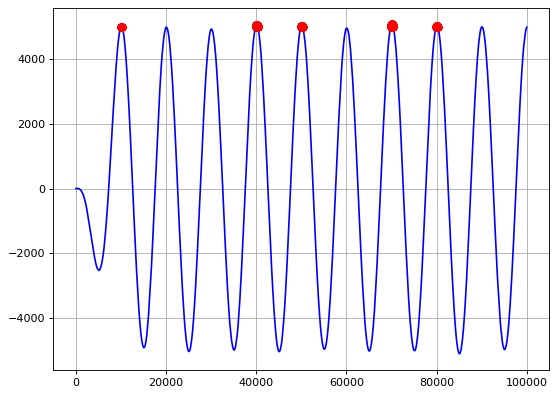

In [18]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(np.asarray(n),y,'b', np.asarray(n)[matches], y[matches], 'ro')
ax.grid()
plt.show()

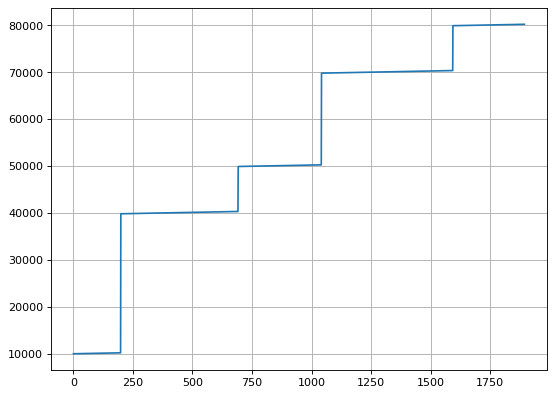

In [19]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(matches)
ax.grid()
plt.show()

In [25]:
s_simulation[matches]

array([1.0016e-06, 1.0017e-06, 1.0018e-06, ..., 8.0246e-06, 8.0247e-06,
       8.0248e-06])